In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Plotting the results of the Experiment

We begin by plotting the results of the N128_experiments

In [ ]:
def parse_npz_files(file_path):
    # Load the npz file
    final_data = np.load(file_path)

    # Extract knn_distance
    knn_distance = final_data['knn_distance']

    # Calculate mean and std for k=1 distances (first column)
    mean_knn = knn_distance[:, 0].mean()
    std_knn = knn_distance[:, 0].std()

    # Calculate memory ratio if k=2 is available (second column)
    if knn_distance.shape[1] > 1:
        mem_ratio = (knn_distance[:, 0] / knn_distance[:, 1] < 1/3).mean()
    else:
        mem_ratio = None

    return mean_knn, std_knn, mem_ratio

In [91]:
# network_snapshot_location_dict = {
#     (128, 0): r'/workspace/AmbientDiffMem/AmbientDiffMemorize/logs_exp2/N128_sigma0/knn-dist',
#     (128, 0.4): r'/workspace/AmbientDiffMem/AmbientDiffMemorize/logs_exp2/N128_sigma0.4/knn-dist',
#     (128, 2): r'/workspace/AmbientDiffMem/AmbientDiffMemorize/logs_exp2/N128_sigma2/knn-dist',
# }

network_snapshot_location_dict = {
    (1000, 0): r'/workspace/AmbientDiffMem/AmbientDiffMemorize/logs_exp2/N1000_sigma0/knn-dist',
    (1000, 0.4): r'/workspace/AmbientDiffMem/AmbientDiffMemorize/logs_exp2/N1000_sigma0.4/knn-dist',
    (1000, 2): r'/workspace/AmbientDiffMem/AmbientDiffMemorize/logs_exp2/N1000_sigma2/knn-dist',
}

# network_snapshot_location_dict = {
#     (64, 0): r'/workspace/AmbientDiffMem/AmbientDiffMemorize/logs/00013-cifar10-32x32-64-uncond-ddpmpp-edm-gpus1-batch32-fp32-mayQK/knn-dist',
#     (64, 0.4): r'/workspace/AmbientDiffMem/AmbientDiffMemorize/logs/00014-cifar10-32x32-64-uncond-sigma0.5-ddpmpp-edm-gpus1-batch32-fp32-KqABH/knn-dist',
#     (64, 2): r'/workspace/AmbientDiffMem/AmbientDiffMemorize/logs/00015-cifar10-32x32-64-uncond-sigma2-ddpmpp-edm-gpus1-batch32-fp32-IqOMr/knn-dist',
# }

# network_snapshot_location_dict = {
#     (256, 0): r'/workspace/AmbientDiffMem/AmbientDiffMemorize/logs_exp2/N256_sigma0/knn-dist',
# }

## Begin Plotting

In [92]:
import os
import glob
import re

# For the experiments with N=128 and each sigma, load results from all .npz files
results = {}

for (N, sigma), dir_path in network_snapshot_location_dict.items():
    npz_files = sorted(glob.glob(os.path.join(dir_path, "*.npz")))

    # Store results as lists: each item is (kimg, mean, std, mem_ratio)
    exp_results = []
    for npz_file in npz_files:
        # Extract kimg value using trailing '-000000' number pattern
        basename = os.path.basename(npz_file)
        # Search for a pattern like '-000500', capture the digits
        match = re.search(r'-([0-9]{6})', basename)
        if match:
            kimg_val = int(match.group(1))
        else:
            kimg_val = None

        mean, std, mem_ratio = parse_npz_files(npz_file)
        exp_results.append({
            'kimg': kimg_val,
            'mean': mean,
            'std': std,
            'mem_ratio': mem_ratio,
            'filename': basename,
            'fullpath': npz_file
        })

    # Sort by kimg (if available)
    exp_results = sorted(exp_results, key=lambda x: x['kimg'] if x['kimg'] is not None else -1)
    results[(N, sigma)] = exp_results

# Results dictionary now has keys (N, sigma), values are lists of dicts with mean/std/mem_ratio vs. kimg

# Convert results to DataFrame for easier plotting
plot_data = []
for (N, sigma), exp_results in results.items():
    for result in exp_results:
        if result['kimg'] is not None:  # Only include entries with valid kimg
            plot_data.append({
                'N': N,
                'sigma': sigma,
                'kimg': result['kimg'],
                'mean_knn': result['mean'],
                'std_knn': result['std'],
                'mem_ratio': result['mem_ratio']
            })

df = pd.DataFrame(plot_data)
print(f"Loaded {len(df)} data points")
print(f"Sigma values: {sorted(df['sigma'].unique())}")
print(f"Kimg range: {df['kimg'].min()} - {df['kimg'].max()}")
df.head()

Loaded 11 data points
Sigma values: [0, 2]
Kimg range: 100 - 600


,N,sigma,kimg,mean_knn,std_knn,mem_ratio
0,1000,0,100,69.411636,1.147385,0.0
1,1000,0,200,72.865974,3.041161,0.0
2,1000,0,300,72.827934,4.897711,0.0
3,1000,0,400,61.802876,6.541962,0.0
4,1000,0,500,49.943813,7.540400,0.0


In [93]:
# Convert results to DataFrame for easier plotting
plot_data = []
for (N, sigma), exp_results in results.items():
    for result in exp_results:
        if result['kimg'] is not None:  # Only include entries with valid kimg
            plot_data.append({
                'N': N,
                'sigma': sigma,
                'kimg': result['kimg'],
                'mean_knn': result['mean'],
                'std_knn': result['std'],
                'mem_ratio': result['mem_ratio']
            })

df = pd.DataFrame(plot_data)
print(f"Loaded {len(df)} data points")
print(f"Sigma values: {sorted(df['sigma'].unique())}")
print(f"Kimg range: {df['kimg'].min()} - {df['kimg'].max()}")
df.head()

Loaded 11 data points
Sigma values: [0, 2]
Kimg range: 100 - 600


,N,sigma,kimg,mean_knn,std_knn,mem_ratio
0,1000,0,100,69.411636,1.147385,0.0
1,1000,0,200,72.865974,3.041161,0.0
2,1000,0,300,72.827934,4.897711,0.0
3,1000,0,400,61.802876,6.541962,0.0
4,1000,0,500,49.943813,7.540400,0.0


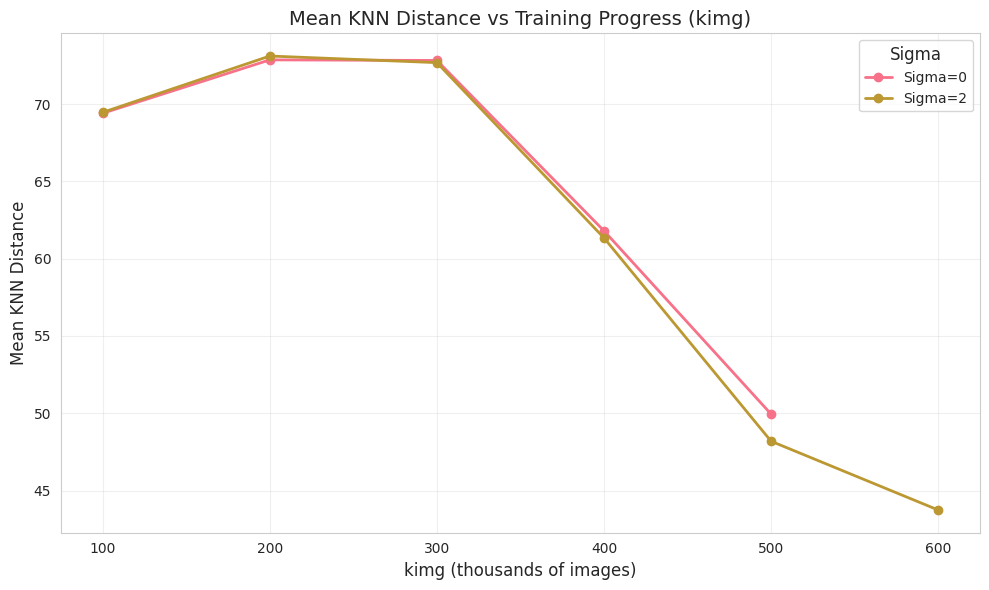

In [94]:
# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Toggle for confidence window (mean ± std fill)
show_confidence_window = 0  # Set to False if you don't want the confidence band

plt.figure(figsize=(10, 6))

# Plot mean KNN distance vs kimg with separate lines for each sigma, and optionally add confidence bands
for sigma, group in df.groupby('sigma'):
    group = group.sort_values('kimg')
    plt.plot(
        group['kimg'],
        group['mean_knn'],
        marker='o',
        label=f'Sigma={sigma}',
        linewidth=2
    )
    if show_confidence_window:
        # Add confidence band (mean ± std)
        plt.fill_between(
            group['kimg'],
            group['mean_knn'] - group['std_knn'],
            group['mean_knn'] + group['std_knn'],
            alpha=0.2
        )

plt.xlabel('kimg (thousands of images)', fontsize=12)
plt.ylabel('Mean KNN Distance', fontsize=12)
plt.title('Mean KNN Distance vs Training Progress (kimg)', fontsize=14)
plt.legend(title='Sigma', fontsize=10, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

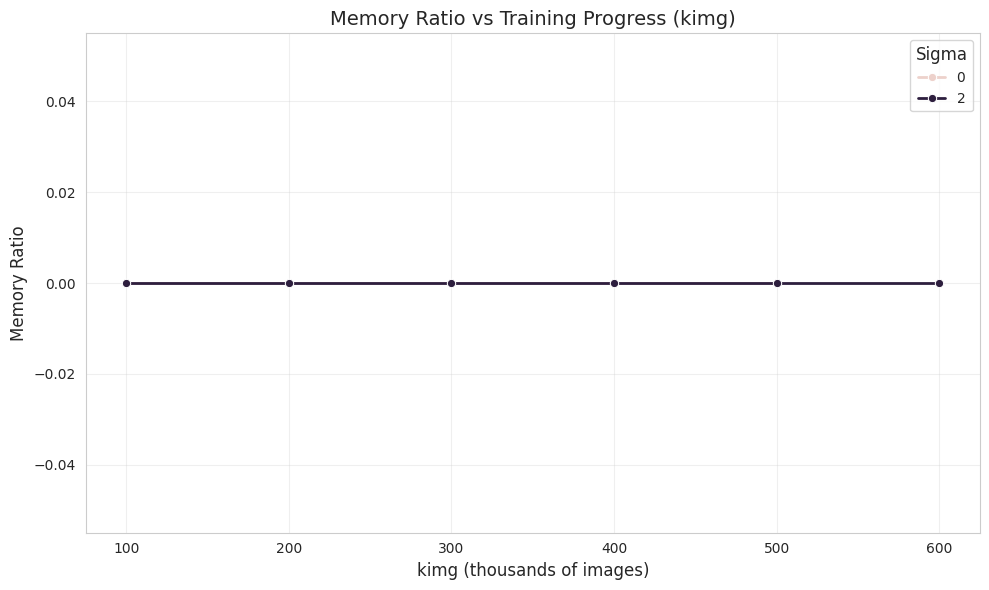

In [95]:
# Option to save the plot, in plots directory with a name option as well

import os

SAVE_PLOT = 0  # Set to True to save the plot
PLOTS_DIR = "plots"
PLOT_FILENAME = "memory_ratio_vs_training_N64_sigma0_0.4_2.png"  # You can change this name if desired

if df['mem_ratio'].notna().any():
    plt.figure(figsize=(10, 6))
    
    ax = sns.lineplot(
        data=df,
        x='kimg',
        y='mem_ratio',
        hue='sigma',
        marker='o',
        markersize=6,
        linewidth=2
    )
    
    plt.xlabel('kimg (thousands of images)', fontsize=12)
    plt.ylabel('Memory Ratio', fontsize=12)
    plt.title('Memory Ratio vs Training Progress (kimg)', fontsize=14)
    plt.legend(title='Sigma', fontsize=10, title_fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    if SAVE_PLOT:
        os.makedirs(PLOTS_DIR, exist_ok=True)
        plot_path = os.path.join(PLOTS_DIR, PLOT_FILENAME)
        plt.savefig(plot_path, dpi=200)
        print(f"Plot saved to {plot_path}")
    plt.show()
else:
    print("Memory ratio data not available")